In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## **LOADING AND THE PREPROCESSING OF CIFAR DATASET**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 10)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## **Defining the vgg19 model**



**Reasoning**:
Import VGG19 and build the model as per the instructions.



In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load the VGG19 model
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers of the VGG19 base model
for layer in vgg19_base.layers:
    layer.trainable = False

# Create a new Sequential model
model = Sequential()

# Add the frozen VGG19 base model
model.add(vgg19_base)

# Add a Flatten layer
model.add(Flatten())

# Add a Dense layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# Add a Dense layer with 10 units and Softmax activation for classification
model.add(Dense(10, activation='softmax'))

# Print a summary of the model
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,158,282 (76.90 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

## **Compiling the model**



**Reasoning**:
Compile the created model with the specified optimizer, loss function, and metrics.



In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Training the model**




**Reasoning**:
Train the compiled model using the training data for 10 epochs, using the validation data to monitor performance, and store the training history.



In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 681s 543ms/step - accuracy: 0.4463 - loss: 1.5651 - val_accuracy: 0.5401 - val_loss: 1.3123
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 666s 531ms/step - accuracy: 0.5587 - loss: 1.2541 - val_accuracy: 0.5469 - val_loss: 1.2662
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 685s 533ms/step - accuracy: 0.5862 - loss: 1.1764 - val_accuracy: 0.5623 - val_loss: 1.2259
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 685s 536ms/step - accuracy: 0.6081 - loss: 1.1222 - val_accuracy: 0.5807 - val_loss: 1.1869
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 680s 534ms/step - accuracy: 0.6174 - loss: 1.0901 - val_accuracy: 0.5823 - val_loss: 1.1992
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 690s 540ms/step - accuracy: 0.6339 - loss: 1.0496 - val_accuracy: 0.5935 - val_loss: 1.1742
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 675s 540ms/step - accuracy: 0.6404 - loss: 1.0241 - val_accuracy: 0.5988 - val_loss: 1.1608
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 664s 532ms/step - ac

In [ ]:
def calculate_average_score(df):
  """Calculates the average score per department.

  Args:
    df: pandas DataFrame with 'Department' and 'Score' columns.

  Returns:
    pandas DataFrame with average score per department.
  """
  average_scores = df.groupby('Department')['Score'].mean().reset_index()
  return average_scores

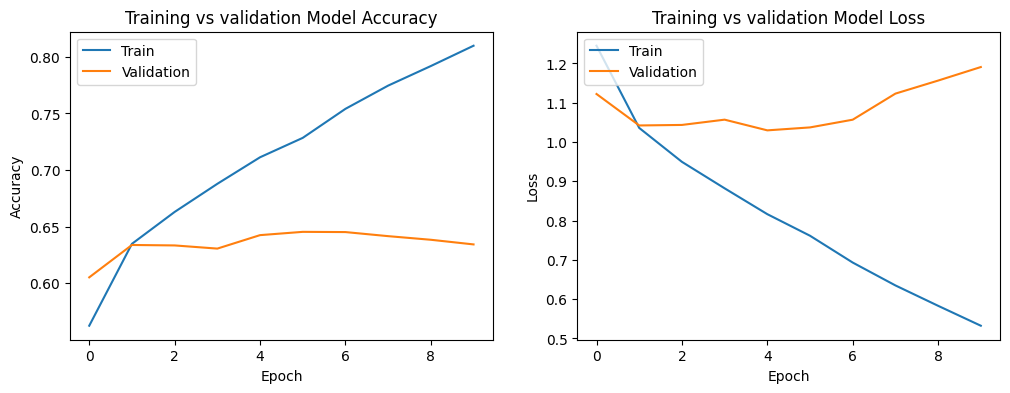

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(densenet_history.history['accuracy'])
plt.plot(densenet_history.history['val_accuracy'])
plt.title('Training vs validation Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(densenet_history.history['loss'])
plt.plot(densenet_history.history['val_loss'])
plt.title('Training vs validation Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## **Classification Report and Confusion Matrix**


313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 459ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1000
           1       0.68      0.62      0.65      1000
           2       0.49      0.56      0.52      1000
           3       0.38      0.55      0.45      1000
           4       0.53      0.53      0.53      1000
           5       0.63      0.40      0.49      1000
           6       0.63      0.68      0.65      1000
           7       0.70      0.61      0.65      1000
           8       0.74      0.66      0.70      1000
           9       0.61      0.70      0.65      1000

    accuracy                           0.60     10000
   macro avg       0.61      0.60      0.60     10000
weighted avg       0.61      0.60      0.60     10000



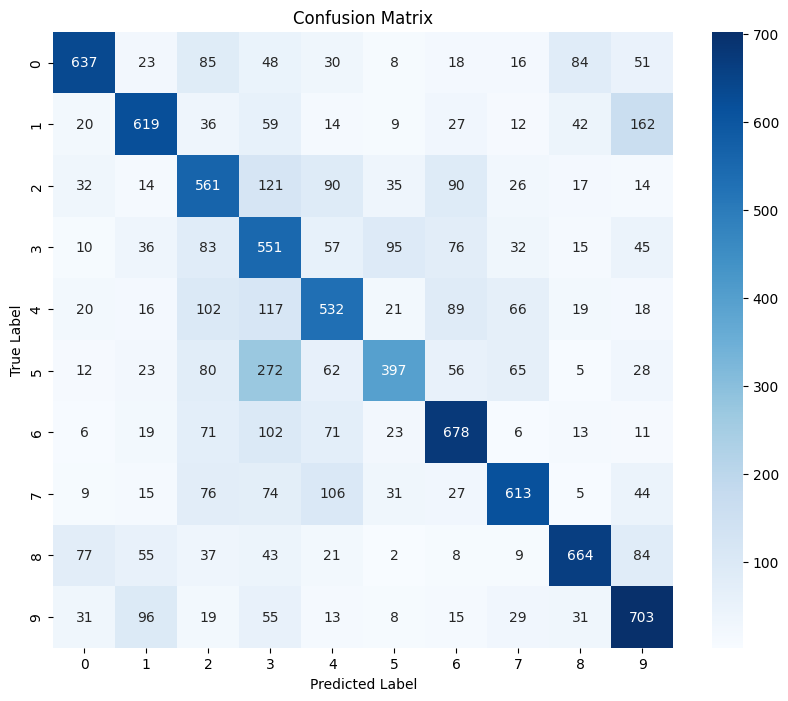

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **Defining the densenet121 model**



In [1]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freezing the layers of the DenseNet121 base model
for layer in densenet_base.layers:
    layer.trainable = False

# Creating a new Sequential model
densenet_model = Sequential()

# Adding the frozen DenseNet121 base model
densenet_model.add(densenet_base)

# Adding a Flatten layer
densenet_model.add(Flatten())

# Adding a Dense layer with 256 units and ReLU activation
densenet_model.add(Dense(256, activation='relu'))

# Adding a Dense layer with 10 units and Softmax activation for classification
densenet_model.add(Dense(10, activation='softmax'))

# Printing a summary of the model
densenet_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1, 1, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,302,474 (27.86 MB)

 Trainable params: 264,970 (1.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

## **Compling the model**



In [2]:
densenet_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# **Training the model**


In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

densenet_history = densenet_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 10)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 182s 135ms/step - accuracy: 0.5063 - loss: 1.4184 - val_accuracy: 0.6052 - val_loss: 1.1222
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 193s 127ms/step - accuracy: 0.6354 - loss: 1.0333 - val_accuracy: 0.6338 - val_loss: 1.0421
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 212s 136ms/step - accuracy: 0.6670 - loss: 0.9355 - val_accuracy: 0.6334 - val_loss: 1.0434
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 170s 136ms/step - accuracy: 0.6922 - loss: 0.8620 - val_accuracy: 0.6306 - val_loss: 1.0569
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 191s 127ms/step - accuracy: 0.7204 - loss: 0.7933 - val_accuracy: 0.6425 - val_loss: 1.0297
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 170s 136ms/step - accuracy: 0.7390 - loss: 0.7345 - val_ac

In [9]:
test_loss, test_acc = densenet_model.evaluate(x_test,
                                     y_test,
                                     verbose=2)

print('Test Accuracy is',test_acc)

313/313 - 31s - 99ms/step - accuracy: 0.6301 - loss: 1.2145
Test Accuracy is 0.6301000118255615


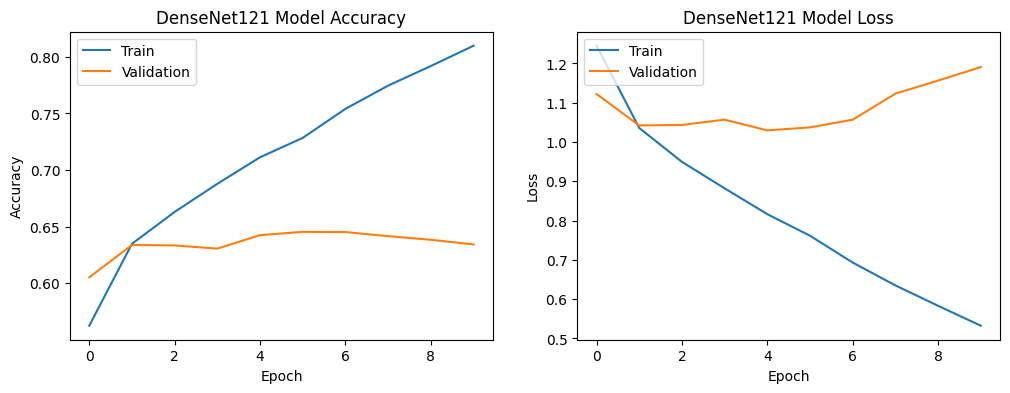

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(densenet_history.history['accuracy'])
plt.plot(densenet_history.history['val_accuracy'])
plt.title('Training vs validation Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(densenet_history.history['loss'])
plt.plot(densenet_history.history['val_loss'])
plt.title('Training vs validation Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step
DenseNet121 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1000
           1       0.65      0.76      0.70      1000
           2       0.54      0.58      0.56      1000
           3       0.49      0.42      0.45      1000
           4       0.56      0.58      0.57      1000
           5       0.51      0.61      0.56      1000
           6       0.67      0.67      0.67      1000
           7       0.76      0.60      0.67      1000
           8       0.75      0.73      0.74      1000
           9       0.72      0.65      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



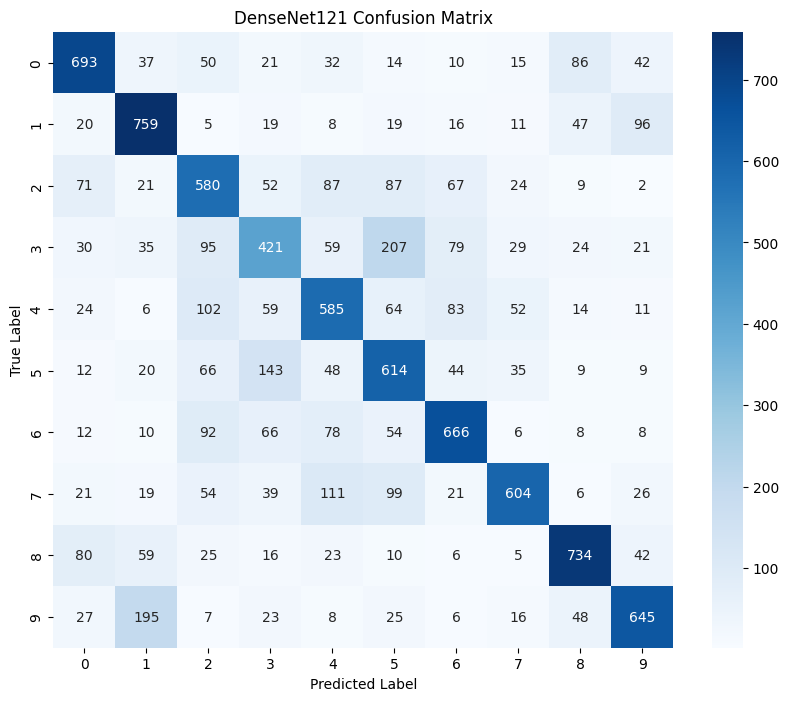

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the test set
y_pred_densenet = densenet_model.predict(x_test)
y_pred_classes_densenet = np.argmax(y_pred_densenet, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
print("DenseNet121 Classification Report:")
print(classification_report(y_true_classes, y_pred_classes_densenet))

# Generate confusion matrix
conf_matrix_densenet = confusion_matrix(y_true_classes, y_pred_classes_densenet)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_densenet, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('DenseNet121 Confusion Matrix')
plt.show()

## **Defining the EfficientNetB0 model**

In [15]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Loading the EfficientNetB0 model
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freezing the layers of the EfficientNetB0 base model
for layer in efficientnet_base.layers:
    layer.trainable = False

# Creating a new Sequential model
efficientnet_model = Sequential()

# Adding the frozen EfficientNetB0 base model
efficientnet_model.add(efficientnet_base)

# Adding a Flatten layer
efficientnet_model.add(Flatten())

# Adding a Dense layer with 256 units and ReLU activation
efficientnet_model.add(Dense(256, activation='relu'))

# Adding a Dense layer with 10 units and Softmax activation for classification
efficientnet_model.add(Dense(10, activation='softmax'))

# Printing a summary of the model
efficientnet_model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1, 1, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,380,077 (16.71 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

## **Compiling the model**

In [16]:
efficientnet_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

## **Training the Model**

In [17]:
efficientnet_history = efficientnet_model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 102s 72ms/step - accuracy: 0.1008 - loss: 2.3191 - val_accuracy: 0.0994 - val_loss: 2.3028
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0933 - val_loss: 2.3028
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 77s 61ms/step - accuracy: 0.0983 - loss: 2.3026 - val_accuracy: 0.0933 - val_loss: 2.3027
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0973 - val_loss: 2.3028
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 65ms/step - accuracy: 0.1047 - loss: 2.3026 - val_accuracy: 0.0979 - val_loss: 2.3027
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.0933 - val_loss: 2.3030
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 66ms/step - accuracy: 0.1003 - loss: 2.3027 - val_accuracy: 0.0933 - val_loss: 2.3029
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 68ms/step - accuracy: 0.100

In [24]:
import os
print(os.listdir())

['.config', '.ipynb_checkpoints', 'data_batch_4', 'readme.html', 'data_batch_5', 'test_batch', 'data_batch_3', 'data_batch_2', 'data_batch_1', 'sample_data']


In [21]:
import pickle

with open('data_batch_1', 'rb') as f:
    data = pickle.load(f, encoding='bytes')

# The data is likely a dictionary, let's inspect the keys and some data
print(data.keys())
# Assuming 'data' key contains the actual data and 'labels' key contains the labels
# Let's look at the shape of the data and labels
print(data[b'data'].shape)
print(len(data[b'labels']))

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
(10000, 3072)
10000


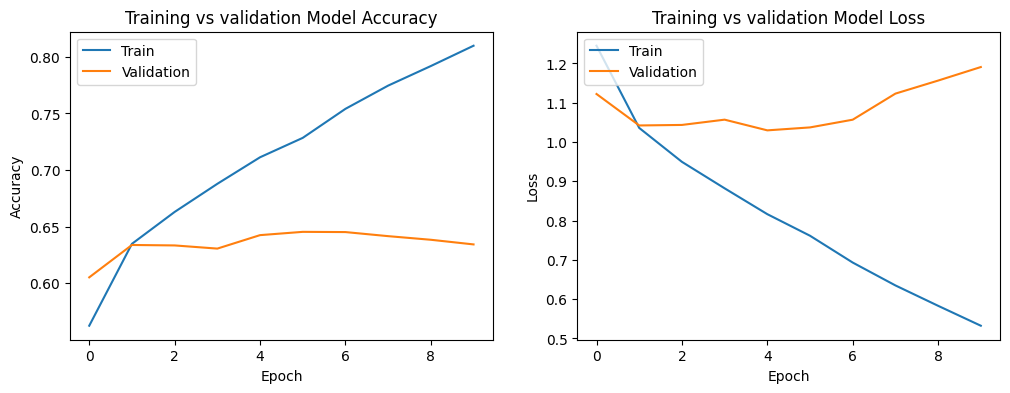

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(densenet_history.history['accuracy'])
plt.plot(densenet_history.history['val_accuracy'])
plt.title('Training vs validation Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(densenet_history.history['loss'])
plt.plot(densenet_history.history['val_loss'])
plt.title('Training vs validation Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()